In [1]:
'''
- around 84.8% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error)
    - Roberta model:
        - Average of 77.1s or 7.83% of video, 
        - Average of 18s or 1.69% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 79.17s or 8% of video, 
        - Average of 20.56s or 1.94% of video, ignoring 20% of outliers
    - No QA-model:
        - Average of 91.25s or 9.26% of video, 
        - Average of 34.83s or 3.4% of video, ignoring 20% of outliers
        - It may not look much worse, but if we look at graph we can notice much difference
            - Graph doesn't just rise in the end, it raises slowly from the start itself
'''
''''''

''

In [2]:
import pandas as pd
from utils import *

In [3]:
qdset = pd.read_csv('../cc-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../cc-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [4]:
tdset = pd.read_csv('../v3-results/cc-dset-results-videoIds-trnidx.csv')
edset = pd.read_csv('../v3-results/cc-dset-results-videoIds-extidx.csv')
bdset = pd.read_csv('../v3-results/cc-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../v3-results/cc-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../v3-results/cc-dset-results-ans-dis.csv')
noqa_ansdset = pd.read_csv('../v3-results/cc-dset-results-ans-noqa.csv')

Video Id retrieval results:

In [5]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


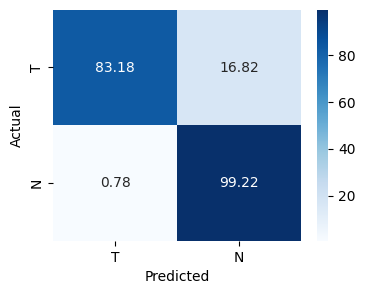

Confused pairs:  [[(201, 302), 17.86], [(104, 201), 17.5], [(303, 402), 10.53], [(105, 205), 10.42], [(301, 401), 9.52]]
Related Videos result:  [77.17, 22.83]


In [6]:
#Transcript Index
predictedVideoIds = list(tdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(tdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


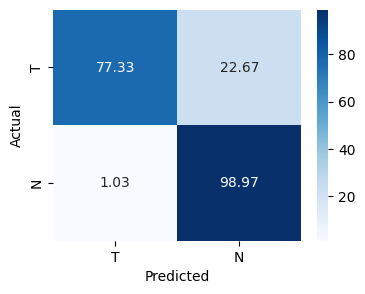

Confused pairs:  [[(104, 201), 20.0], [(301, 401), 14.29], [(301, 305), 13.56], [(102, 403), 11.11], [(201, 302), 10.71]]
Related Videos result:  [50.81, 49.19]


In [7]:
#Extracted-Text Index
predictedVideoIds = list(edset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(edset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


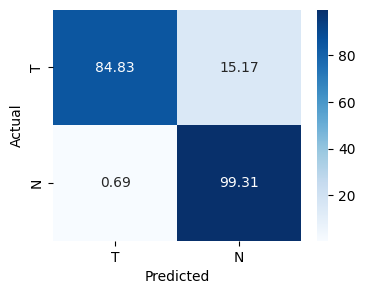

Confused pairs:  [[(301, 401), 19.05], [(201, 302), 17.86], [(104, 201), 12.5], [(301, 305), 11.86], [(303, 402), 7.89]]
Related Videos result:  [83.13, 16.87]


In [8]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [9]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,an important topic in cloud computing security.,30,35,an important topic in cloud computing security...,30,43,NaN,101,What is authentication?,28,1081
1,101,identity provider for customers.,473,476,Keystone acts as the identity provider for cus...,470,476,NaN,101,What is Keystone?,54,1081
2,101,an abstraction used by other open stack servic...,80,93,a project is an abstraction used by other open...,80,93,NaN,101,What is a project in Keystone?,80,1081
3,101,to be the registry of projects,93,98,to be the registry of projects and to articula...,93,102,NaN,101,What is the fundamental purpose of the keystone?,92,1081
4,101,that the user or user group has some kind of a...,115,126,that the user or user group has some kind of a...,115,126,NaN,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 7.82
80% Mean: 1.7


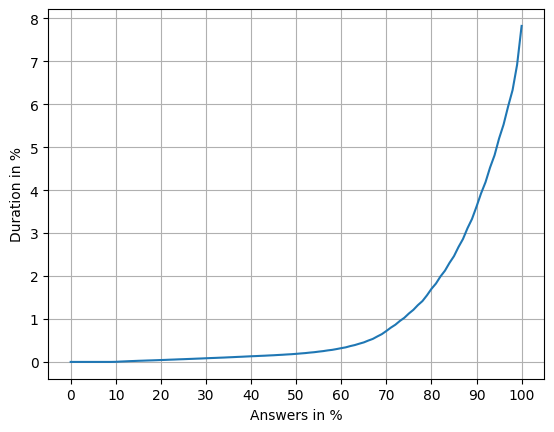

100% Mean: 77.04
80% Mean: 18.05


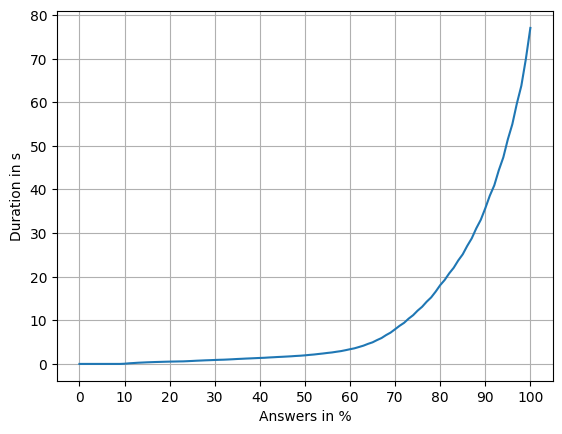

In [10]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 7.83
80% Mean: 1.69


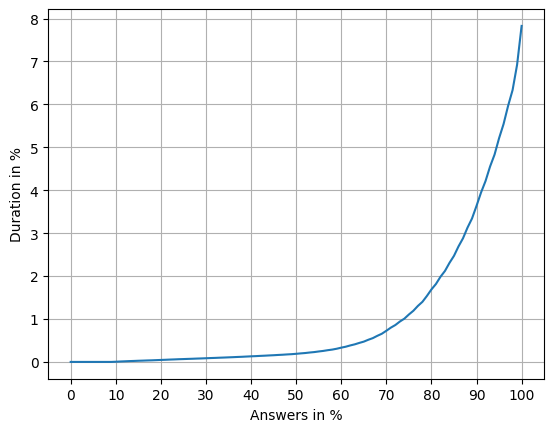

100% Mean: 77.15
80% Mean: 17.87


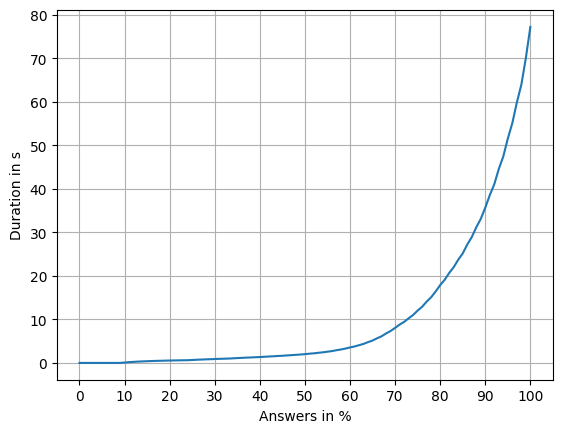

In [11]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 7.83
80% Mean: 1.69


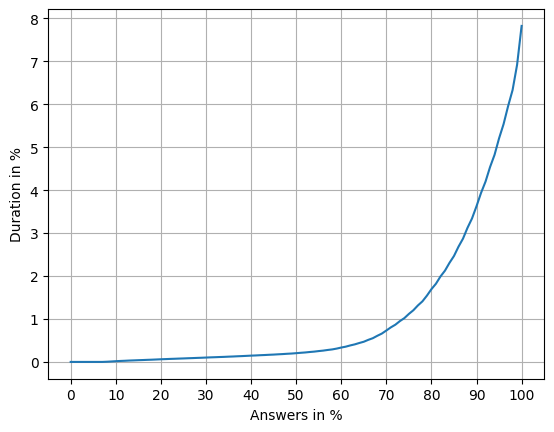

100% Mean: 77.1
80% Mean: 17.99


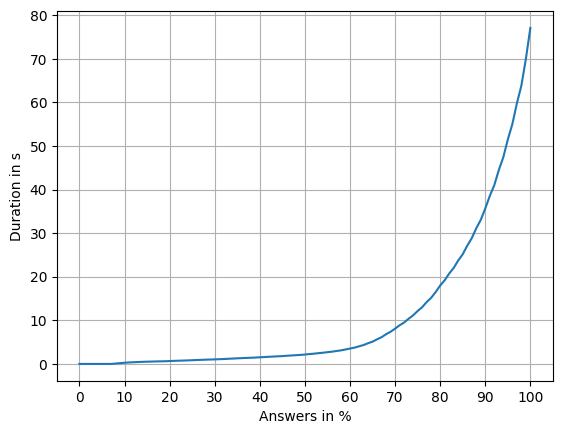

In [12]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [13]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,let us understand authentication in the cloud....,8,24,let us understand authentication in the cloud....,8,58,NaN,101,What is authentication?,28,1081
1,101,identity provider for customers,473,476,the identity provider for customers,473,476,NaN,101,What is Keystone?,54,1081
2,101,an abstraction used by other open stack servic...,80,93,an abstraction used by other open stack servic...,80,93,NaN,101,What is a project in Keystone?,80,1081
3,101,the registry of projects,93,98,to be the registry of projects and to articula...,93,102,NaN,101,What is the fundamental purpose of the keystone?,92,1081
4,101,the user or user group has some kind of access...,115,126,that the user or user group has some kind of a...,115,126,NaN,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 7.98
80% Mean: 1.91


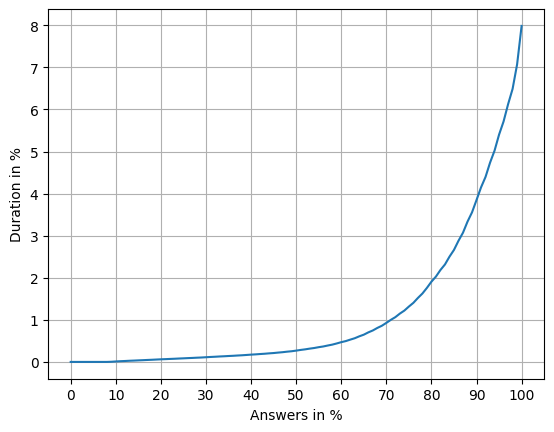

100% Mean: 78.87
80% Mean: 20.17


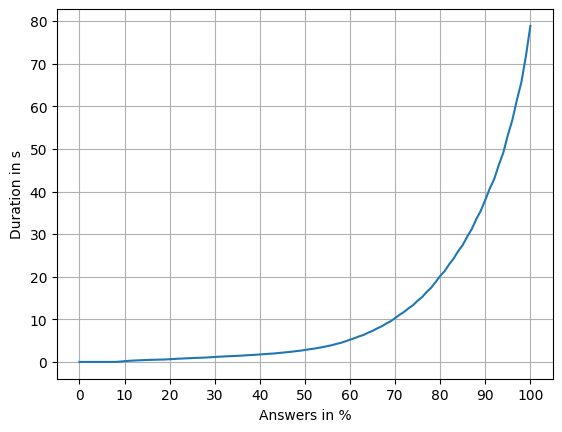

In [14]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 8.05
80% Mean: 1.97


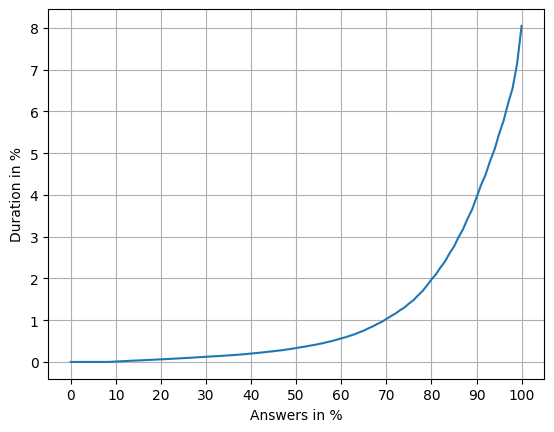

100% Mean: 79.48
80% Mean: 20.89


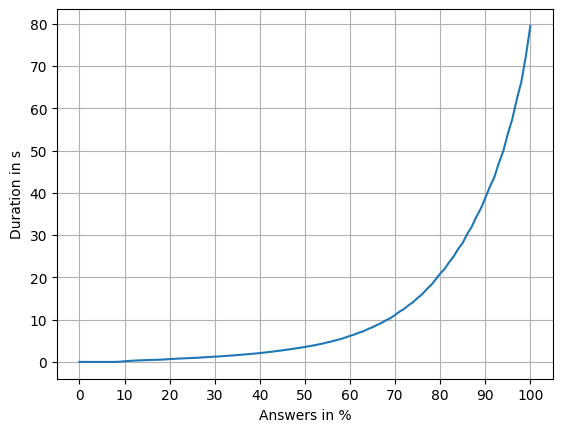

In [15]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 8.02
80% Mean: 1.94


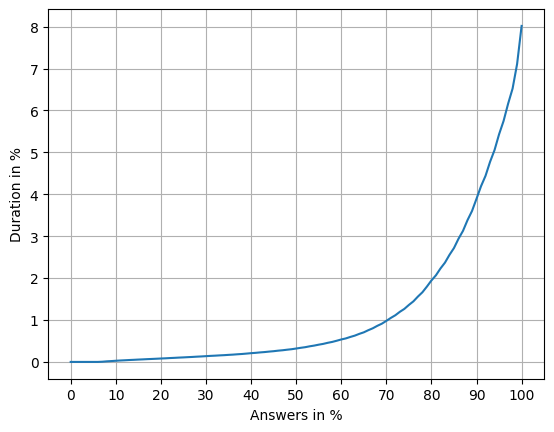

100% Mean: 79.17
80% Mean: 20.56


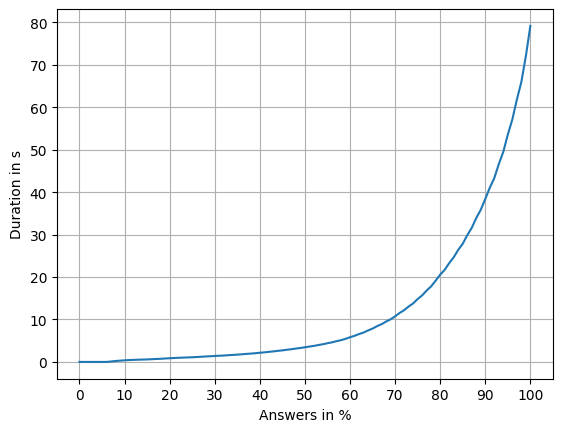

In [16]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (No QA-Model):

In [17]:
dset = noqa_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer_start,BestAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,2,77,NaN,101,What is authentication?,28,1081
1,101,420,476,NaN,101,What is Keystone?,54,1081
2,101,77,138,NaN,101,What is a project in Keystone?,80,1081
3,101,77,138,NaN,101,What is the fundamental purpose of the keystone?,92,1081
4,101,77,138,NaN,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 9.26
80% Mean: 3.39


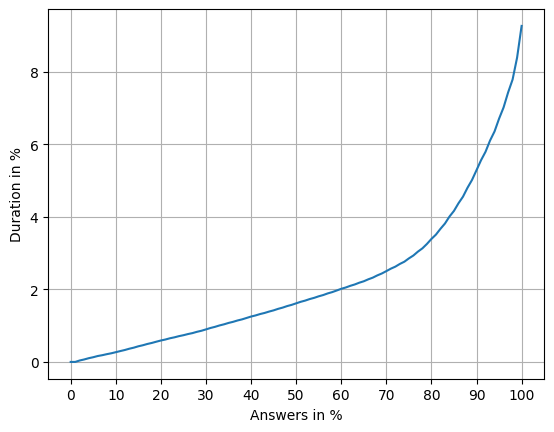

100% Mean: 91.25
80% Mean: 34.83


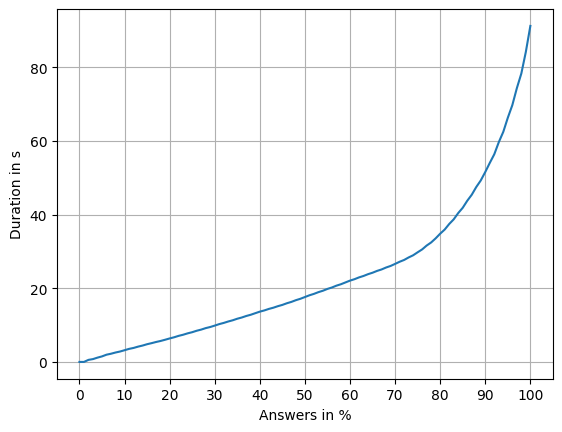

In [18]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')